## ASSIGNMENT-1: Transformations, Mapping and Data Representations

Roll number: 2021102016

### Instructions
 * Fill in the roll-number in the cell above.
 * Code must be written in Python in Jupyter Notebooks. We highly recommend using anaconda distribution or at the minimum, virtual environments for this assignment.
 * All the code and result files should be uploaded in the github classroom.
 * For this assignment, you will be using Open3D and AI2Thor extensively. Refer to [Open3D](http://www.open3d.org/docs/release/) and [AI2Thor](https://github.com/allenai/ai2thor) documentation.
 *  Most of the questions require you to **code your own functions** unless there is a need to call in the abilities of the mentioned libraries, such as Visualisation from Open3D. Make sure your code is modular since you will be reusing them for future assignments. All the functions related to transformation matrices, quaternions, and 3D projection are expected to be coded by you.
 *  All the representations are expected to be in a right-hand coordinate system.
<!--  * Answer to the descriptive questions should be answered in your own words. Copy-paste answers will lead to penalty. -->
 * You could split the Jupyter Notebook cells where TODO is written, but please try to avoid splitting/changing the structure of other cells.
 * All the visualization should be done inside the notebook unless specified otherwise.
 * Plagiarism will lead to heavy penalty.
 * Commit this notebook in the repo and any other results files under the result folder in the GitHub Classroom repo. 
 * Commits past the deadline will not be considered.

In [13]:
# List the imports here
import numpy as np
import scipy
from scipy.optimize import fsolve
import open3d as o3d
import copy
import time


### SECTION 1: Transformations and representations

#### 1.1 Euler angles

a. Write a function that returns a rotation matrix given the angles (𝛼, 𝛽, 𝛾) = (π/6, 7π/18, 2π/9) in radians (X-Y-Z). Do not use inbuilt functions.

b. Solve for angles using fsolve from scipy for three initializations of your choice and compare.
$$M(\alpha , \beta ,\gamma)=\left[\begin{array}{rrr}0.72907076 & -0.56745855 & 0.38268343 \\0.64785386 & 0.39180184 & -0.65328148 \\
    0.22077409 & 0.72421137 & 0.65328148\end{array}\right] 
$$

c. Show an example where a Gimbal lock occurs and visualize the Gimbal lock on the given point cloud, data/toothless.ply. You have to show the above by animation (rotation along each axis one by one).

Hint: Use Open3D's non-blocking visualization and discretize the rotation to simulate the animation. For example, if you want to rotate by 20° around a particular axis, do so in increments of 5° 4 times to make it look like an animation.

In [14]:
##############################################################################
# TODO: Do tasks described in 1.1 (a)
    
def rotation_matrix_xyz(alpha, beta, gamma):
    # Rotation matrix around X-axis (Roll)
    R_x = np.array([[1, 0, 0],
                    [0, np.cos(alpha), -np.sin(alpha)],
                    [0, np.sin(alpha), np.cos(alpha)]])

    # Rotation matrix around Y-axis (Pitch)
    R_y = np.array([[np.cos(beta), 0, np.sin(beta)],
                    [0, 1, 0],
                    [-np.sin(beta), 0, np.cos(beta)]])

    # Rotation matrix around Z-axis (Yaw)
    R_z = np.array([[np.cos(gamma), -np.sin(gamma), 0],
                    [np.sin(gamma), np.cos(gamma), 0],
                    [0, 0, 1]])

    # Combine the rotation matrices in the specified order (X-Y-Z)
    R_xyz = np.dot(np.dot(R_x, R_y), R_z)

    return R_xyz

pi=np.pi
alpha = pi / 6
beta = 7 * pi / 18
gamma = 2 * pi / 9
rotation_matrix = rotation_matrix_xyz(alpha, beta, gamma)
print(rotation_matrix)

##############################################################################
# END OF YOUR CODE
##############################################################################

[[ 0.26200263 -0.21984631  0.93969262]
 [ 0.91659355  0.36140256 -0.17101007]
 [-0.30201139  0.90612129  0.29619813]]


In [15]:
##############################################################################
# TODO: Do tasks described in 1.1 (b)
##############################################################################

# Function to compute the Euclidean distance between two points
def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

# Define the ideal rotation matrix
ideal_rotation_matrix = np.array([[0.72907076, -0.56745855, 0.38268343],
                       [0.64785386, 0.39180184, -0.65328148],
                       [0.22077409, 0.72421137, 0.65328148]])

# Function to minimize
def minimize_function(angles,ideal_rotation_matrix):
    rotation_matrix = rotation_matrix_xyz(angles[0], angles[1], angles[2])
    points = np.array([[1, 1, 1], [1, 0, 1], [1, 1, 0]])
    ideal_points = np.matmul(ideal_rotation_matrix, points.T)
    expected_points = np.matmul(rotation_matrix, points.T)
    return [euclidean_distance(ideal_points[:, i], expected_points[:, i]) for i in range(3)]

for i in range(3):
    initialization = np.random.randn(3)
    solution = scipy.optimize.fsolve(minimize_function, initialization, args=(ideal_rotation_matrix,))
    print(f"Trial {i + 1} with with initial angles: Alpha={initialization[0]}, Beta={initialization[1]}, Gamma={initialization[2]}")
    rotation_matrix_result = rotation_matrix_xyz(solution[0], solution[1], solution[2])
    print(rotation_matrix_result)


##############################################################################
# END OF YOUR CODE
##############################################################################

Trial 1 with with initial angles: Alpha=-0.9327847611695151, Beta=-0.20643550725493418, Gamma=1.2778672094918857
[[ 0.72907076 -0.56745856  0.38268343]
 [ 0.64785386  0.39180184 -0.65328148]
 [ 0.22077409  0.72421137  0.65328148]]
Trial 2 with with initial angles: Alpha=0.38349337811544404, Beta=2.727820346320981, Gamma=-0.23864366489965924
[[ 0.72907077 -0.56745853  0.38268347]
 [ 0.64785386  0.39180181 -0.6532815 ]
 [ 0.22077408  0.72421141  0.65328144]]
Trial 3 with with initial angles: Alpha=0.6162539354868902, Beta=-0.6417283408217588, Gamma=-1.540582098522735
[[ 0.72907077 -0.56745855  0.38268344]
 [ 0.64785386  0.39180185 -0.65328148]
 [ 0.22077408  0.72421137  0.65328148]]


/Users/ashishchokhani/miniconda3/envs/mr_ass1/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [7]:
##############################################################################
# TODO: Do tasks described in 1.1 (c)
##############################################################################

        
import open3d as o3d
import numpy as np
import copy
import time


point_cloud = o3d.io.read_point_cloud("data/toothless.ply")
vis = o3d.visualization.Visualizer()
vis.create_window()
vis.add_geometry(point_cloud)

def update_visualization(rotation_matrix):
    transformed_point_cloud = copy.deepcopy(point_cloud)
    transformation_matrix = np.eye(4)
    transformation_matrix[:3, :3] = rotation_matrix
    transformed_point_cloud.transform(transformation_matrix)
    vis.clear_geometries()
    vis.add_geometry(transformed_point_cloud)
    vis.poll_events()
    vis.update_renderer()

angles = [0, 0, 0]
rotation_step = 5

def rotate_along_axes():
    for axis_index in range(3):
        for angle in range(0, 181, rotation_step):
            angles[axis_index] = angle
            alpha,beta,gamma=np.radians(angles[0]),np.radians(angles[1]),np.radians(angles[2])
            current_rotation_matrix = rotation_matrix_xyz(alpha,beta,gamma)
            update_visualization(current_rotation_matrix)
            vis.update_renderer()
            time.sleep(0.1) 
rotate_along_axes()
vis.run()
vis.destroy_window()


##############################################################################
# END OF YOUR CODE
##############################################################################

[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display


: 

#### 1.2: Quaternions


a. Convert a rotation matrix to quaternion and vice versa. Do not use inbuilt libraries for this question.

b. Perform matrix multiplication of two 3×3 rotation matrices and perform the same transformation in the quaternion space. Verify if the final transformation obtained in both cases is the same.

c. Try to interpolate any given model between two rotation matrices and visualize!

In [ ]:
##############################################################################
# TODO: Do tasks described in 1.2 (a)
##############################################################################

import numpy as np

def rot_matrix_to_quaternion(R):
    w = np.sqrt(1 + R[0, 0] + R[1, 1] + R[2, 2]) / 2
    x = (R[2, 1] - R[1, 2]) / (4 * w)
    y = (R[0, 2] - R[2, 0]) / (4 * w)
    z = (R[1, 0] - R[0, 1]) / (4 * w)
    return w, x, y, z

def quaternion_to_rot_matrix(w, x, y, z):
    R = np.zeros((3, 3))
    R[0, 0] = 1 - 2 * (y**2 + z**2)
    R[0, 1] = 2 * (x*y - z*w)
    R[0, 2] = 2 * (x*z + y*w)
    R[1, 0] = 2 * (x*y + z*w)
    R[1, 1] = 1 - 2 * (x**2 + z**2)
    R[1, 2] = 2 * (y*z - x*w)
    R[2, 0] = 2 * (x*z - y*w)
    R[2, 1] = 2 * (y*z + x*w)
    R[2, 2] = 1 - 2 * (x**2 + y**2)
    return R


R = np.array([[0.866, -0.5, 0], [0.5, 0.866, 0], [0, 0, 1]])
print("R:")
print(R)
    
q = rot_matrix_to_quaternion(R)
print("\nQ:")
print(q)

q_input = (0.866, 0.25, 0.25, 0.353)
print("\nQ Input:")
print(q_input)

R_result = quaternion_to_rot_matrix(*q_input)
print("\nR:")
print(R_result)


# ##############################################################################
# # END OF YOUR CODE
# ##############################################################################

In [ ]:
##############################################################################
# TODO: Do tasks described in 1.2 (b)
##############################################################################

import math

def multiply_quaternions(q1, q2):
    w1, x1, y1, z1 = q1
    w2, x2, y2, z2 = q2
    w = w1 * w2 - x1 * x2 - y1 * y2 - z1 * z2
    x = w1 * x2 + x1 * w2 + y1 * z2 - z1 * y2
    y = w1 * y2 + y1 * w2 + z1 * x2 - x1 * z2
    z = w1 * z2 + z1 * w2 + x1 * y2 - y1 * x2
    return w, x, y, z

np.random.seed(0) 
angle1 = np.random.rand(3)
angle2 = np.random.rand(3)
R1=rotation_matrix_xyz(*angle1)
R2=rotation_matrix_xyz(*angle2)
Q1 = rot_matrix_to_quaternion(R1)
Q2 = rot_matrix_to_quaternion(R2)
Q_combined = multiply_quaternions(Q1, Q2)
R_combined = quaternion_to_rot_matrix(*Q_combined)
euclidean_distance = np.linalg.norm(R_combined - np.dot(R1, R2))

print("R1:")
print(R1)
print("\nR2:")
print(R2)
print("\nR_combined:")
print(R_combined)
print("\nR1*R2")
print(np.dot(R1,R2))
print("\nEuclidean Distance between R_combined and R1*R2:", euclidean_distance)

##############################################################################
# END OF YOUR CODE
##############################################################################

In [1]:
##############################################################################
# TODO: Do tasks described in 1.2 (c)
##############################################################################

import open3d as o3d
import numpy as np
import time

# Function to interpolate between two rotation matrices using LERP
def interpolate_rotation_matrices_lerp(R1, R2, num_steps):
    intermediates = []
    for i in range(num_steps):
        t = i / (num_steps - 1)
        R_interpolated = (1 - t) * R1 + t * R2
        intermediates.append(R_interpolated)
    return intermediates

def transform_point_cloud(point_cloud, rotation_matrix):
    transformed_points = np.dot(rotation_matrix, np.asarray(point_cloud.points).T).T
    point_cloud.points = o3d.utility.Vector3dVector(transformed_points)

point_cloud = o3d.io.read_point_cloud("data/toothless.ply")
R1 = np.array([[1, 0, 0],
               [0, np.cos(np.radians(15)), -np.sin(np.radians(15))],
               [0, np.sin(np.radians(15)), np.cos(np.radians(15))]])

R2 = np.array([[np.cos(np.radians(30)), 0, np.sin(np.radians(30))],
               [0, 1, 0],
               [-np.sin(np.radians(30)), 0, np.cos(np.radians(30))]])

num_steps = 19

# Interpolate between R1 and R2 with more intermediate steps using LERP
intermediate_rotations = interpolate_rotation_matrices_lerp(R1, R2, num_steps)

vis = o3d.visualization.Visualizer()
vis.create_window()
vis.add_geometry(point_cloud)
sleep_time = 0.5

for R_interpolated in intermediate_rotations:
    transform_point_cloud(point_cloud, R_interpolated)
    vis.update_geometry(point_cloud)
    vis.poll_events()
    vis.update_renderer()
    time.sleep(sleep_time)  
    
vis.run()
vis.destroy_window()


##############################################################################
# END OF YOUR CODE
##############################################################################

[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display


#### 1.3: Waypoint generation and trajectory visualization

Read the point cloud given for this question. Make it move in a trajectory of the shape assigned to you. Find the letter assigned to you in the linked [sheet](https://docs.google.com/spreadsheets/d/1dxOndEURQky4Tp-qvxR8E1Z5gPkF6RYVifHqO5eoN7s/edit#gid=0). Corresponding to the letter, check the stylized font from data/alphabets.jpg that is to be used as the trajectory.  

You need to figure out the waypoints and the transformations between each of them and visualize the overall trajectory in a smooth manner just like in question 1.1 (c). You can select any point as your start in the shape and should add a coordinate frame at the beginning point. You should keep the motion consistent and there should not be any jumps in the trajectory, this can be done by going back along the trajectory that has already been traversed.
For eg., for letter H, if you decide to visualise the left vertical line first(|) from top to bottom, you can traverse back to the midpoint and now start going rightwards to the other vertical line(|). Basically, the motion should be all in one go without any jumps, just like that of a normal mobile robot.

Also, the heading of the pointcloud should be facing the direction its moving.

*The above Transformation and representation questions require you to code your own functions and only verify using inbuilt functions.*

In [12]:
##############################################################################
# TODO: Do tasks described in 1.1 (c)
##############################################################################

import open3d as o3d
import numpy as np
import time

point_cloud = o3d.io.read_point_cloud("data/toothless.ply")

# Define the 'S' shape trajectory
trajectory_points = np.array([
    [0, 0, 0],    
    [0.5, 0, 0],   
    [0.5, 0.75, 0],
    [-0.5,0.75, 0], 
    [-0.5,0, 0], 
    [-0.5,0.75, 0],
    [0.5,0.75, 0],
    [1.75,0, 0], 
])

point_cloud_color=[]
vis = o3d.visualization.Visualizer()
vis.create_window()
vis.add_geometry(point_cloud)
num_steps = 100
lines = []
colors = []
for i in range(1, len(trajectory_points)):
    start_point = trajectory_points[i - 1]
    end_point = trajectory_points[i]
    intermediate_translation = [start_point + (end_point - start_point) * (step / num_steps) for step in range(1, num_steps)]
    lines.extend([intermediate_translation[i], intermediate_translation[i + 1]] for i in range(len(intermediate_translation) - 1))
    
line_set = o3d.geometry.LineSet()
line_set.points = o3d.utility.Vector3dVector(np.array(lines).reshape(-1, 3))
line_set.lines = o3d.utility.Vector2iVector(np.arange(len(lines)).reshape(-1, 2))
vis.add_geometry(line_set)

for i in range(1, len(trajectory_points)):
    start_point = trajectory_points[i - 1]
    end_point = trajectory_points[i]
    intermediate_translation = [start_point + (end_point - start_point) * (step / num_steps) for step in range(1, num_steps)]

    for translation_step in intermediate_translation:
        transformation_matrix = np.identity(4)
        transformation_matrix[:3, 3] = translation_step
        point_cloud.transform(transformation_matrix)
        vis.update_geometry(point_cloud)
        vis.poll_events()
        vis.update_renderer()
        time.sleep(0.02)
vis.run()
vis.destroy_window()

##############################################################################
# END OF YOUR CODE
##############################################################################

[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display


### SECTION 2: 3D Mapping from RGB-D Data

For this question, read the documentation of [Open3D](http://www.open3d.org/docs/release/) and [AI2Thor](https://github.com/allenai/ai2thor). Find the scene assigned to you in the linked [sheet](https://docs.google.com/spreadsheets/d/1dxOndEURQky4Tp-qvxR8E1Z5gPkF6RYVifHqO5eoN7s/edit#gid=0). 

2.1 Set up AI2Thor and open the scene assigned to you. Get familiar with the controller and how to change FOV, camera height, enable depth images, and move around the scene.

2.2 Write a script to record the current pose, camera, and depth images after every movement (use WASD or arrow keys for movement) - current pose should be in the AI2Thor frame and at the ground level - pose format (x, y, z, q0, q1, q2, q3). You can store any additional data, if needed, in a separate file.

2.3 Create a point cloud using Open3D for every pair of RGBD images - project the depth image to the 3D point cloud and assign a color to the points from the RGB images and make a point cloud using these points. Write your own functions for the projection and color assignment.

2.4 Transform the point clouds to their camera frame (Figure out the transformations between the camera and pose frames) - use the function from Q1 to get the rotation matrices. The frames may not be in the same hand-system.

2.5 Join all the point clouds to make a combined point cloud of the environment - also, visualize the point cloud stitching and the camera frame movement (i.e., trajectory)

2.6 Create occupancy grid maps of the environment from different heights.

**Helper function to generate the camera matrix given height, width and fov is given to you.**

In [16]:
def get_ai2thor_camera_matrix(h, w, fov):
    cam_mat = np.eye(3)
    cam_mat[0, 0] = cam_mat[1, 1] = w / (2.0 * np.tan(np.deg2rad(fov / 2)))
    cam_mat[0, 2] = w / 2.0
    cam_mat[1, 2] = h / 2.0
    return cam_mat

In [ ]:
##############################################################################
# TODO: Do tasks described in 2.1
##############################################################################

import ai2thor_colab
from ai2thor.platform import CloudRendering
ai2thor_colab.start_xserver()
from ai2thor.controller import Controller
from ai2thor_colab import plot_frames


controller = Controller(
    agentMode="default",
    visibilityDistance=4.5,
    scene="FloorPlan314",

    # step sizes
    gridSize=0.25,
    snapToGrid=True,
    rotateStepDegrees=90,

    # image modalities
    renderDepthImage=True,
    renderInstanceSegmentation=False,

    # camera properties
    width=300,
    height=400,
    fieldOfView=90
)
plot_frames(controller.last_event)
event=controller.step("MoveAhead")
plot_frames(controller.last_event)
print(event.metadata['agent'])
event=controller.step("MoveLeft")
plot_frames(controller.last_event)
print(event.metadata['agent'])
event=controller.step(action="LookUp",degrees=30)
plot_frames(controller.last_event)
print(event.metadata['agent'])

##############################################################################
# END OF YOUR CODE
##############################################################################

In [ ]:
##############################################################################
# TODO: Do tasks described in 2.2
##############################################################################

import ai2thor
import ai2thor.controller
from ai2thor.controller import Controller
import numpy as np
import json
import os
from PIL import Image
import ai2thor_colab
from ai2thor_colab import plot_frames

# Convert Euler angles (in degrees) to a quaternion
def euler_to_quaternion(yaw, pitch, roll):
    yaw = np.radians(yaw)
    pitch = np.radians(pitch)
    roll = np.radians(roll)
    cy = np.cos(yaw * 0.5)
    sy = np.sin(yaw * 0.5)
    cp = np.cos(pitch * 0.5)
    sp = np.sin(pitch * 0.5)
    cr = np.cos(roll * 0.5)
    sr = np.sin(roll * 0.5)
    q0 = cy * cp * cr + sy * sp * sr
    q1 = cy * cp * sr - sy * sp * cr
    q2 = sy * cp * sr + cy * sp * cr
    q3 = sy * cp * cr - cy * sp * sr
    return q0, q1, q2, q3


controller = Controller(scene="FloorPlan314",renderDepthImage=True,gridSize=0.25)
output_dir = "recordings"
os.makedirs(output_dir, exist_ok=True)


def save_data(filename, data):
    with open(filename, 'w') as json_file:
        json.dump(data, json_file, indent=4)

recordings = []

# Movement keys mapping (WASD or arrow keys)
movement_actions = {
    'w': "MoveAhead",
    's': "MoveBack",
    'a': "MoveLeft",
    'd': "MoveRight",
    'up': "MoveAhead",
    'down': "MoveBack",
    'left': "MoveLeft",
    'right': "MoveRight"
}

movement_counter = 1

while True:
    print("Press W/A/S/D or arrow keys to move, Q to quit:")
    key = input().strip().lower()

    if key == 'q':
        break

    if key in movement_actions:
        action = movement_actions[key]
        event = controller.step(action)
        current_pose_data = event.metadata['agent']
        depth_frame = event.depth_frame
        RGB_frame=event.frame
        
        recording_dir = os.path.join(output_dir, f"recording_{movement_counter}")
        os.makedirs(recording_dir, exist_ok=True)
        depth_image_path = os.path.join(recording_dir, f"depth_image_{movement_counter}.png")
        RGB_image_path = os.path.join(recording_dir, f"RGB_image_{movement_counter}.png")
        depth_min = 0.1
        depth_max = 5.0
        normalized_depth = ((depth_frame - depth_min) / (depth_max - depth_min) * 255).astype(np.uint8)
        normalized_depth_RGB = ((RGB_frame - depth_min) / (depth_max - depth_min) * 255).astype(np.uint8)
        depth_image = Image.fromarray(normalized_depth, 'L')
        depth_image.save(depth_image_path)
        Image.fromarray(RGB_frame).save(RGB_image_path)
        rotation_euler=current_pose_data['rotation']
        recordings.append({
            "pose": current_pose_data['position'],
            "quaternion": euler_to_quaternion(rotation_euler['x'],rotation_euler['y'],rotation_euler['z']),
            "Euler": rotation_euler
        })
        movement_counter += 1

data = {"recordings": recordings}

save_data(os.path.join(output_dir, "recordings.json"),data)
controller.stop()

##############################################################################
# END OF YOUR CODE
##############################################################################

In [74]:
##############################################################################
# TODO: Do tasks described in 2.3
##############################################################################

import open3d as o3d
import os
import matplotlib.pyplot as plt
import numpy as np

point_cloud_list=[]
point_list=[]
camera_matrices_list=[]
base_dir = "recordings"


for i in range(1,6):
    recording_dir = os.path.join(base_dir, f"recording_{i}")
    rgb_image_path = os.path.join(recording_dir, f"RGB_image_{i}.png")
    depth_image_path = os.path.join(recording_dir, f"depth_image_{i}.png")
    rgb_image = o3d.io.read_image(rgb_image_path)
    depth_image = o3d.io.read_image(depth_image_path)
    rgb_np = np.asarray(rgb_image)
    depth_np = np.asarray(depth_image)
    height, width, _ = rgb_np.shape  # Assuming RGB image dimensions are the same
    camera_matrix=get_ai2thor_camera_matrix(300,300,90)
    camera_matrices_list.append(camera_matrix)
    point_cloud = o3d.geometry.PointCloud()
    for v in range(height):
        for u in range(width):
            depth_value = depth_np[v, u] / 1000.0
            point = np.dot(np.linalg.inv(camera_matrix), np.array([u, v, 1]) * depth_value)
            point_list.append(point)
            color = rgb_np[v, u]
            point_cloud.points.append(point)
            point_cloud.colors.append(color / 255.0)


    point_cloud_list.append(point_cloud)
    o3d.visualization.draw_geometries([point_cloud])

##############################################################################
# END OF YOUR CODE
##############################################################################

In [43]:
##############################################################################
# TODO: Do tasks described in 2.4
##############################################################################
import open3d as o3d
import os
import matplotlib.pyplot as plt
import numpy as np
from math import cos, sin, radians
from scipy.spatial.transform import Rotation
import json

current_directory = os.getcwd()
file_path = os.path.join(current_directory, 'recordings/recordings.json')
pose_list = []
euler_list = []

with open(file_path, 'r') as json_file:
    json_data = json.load(json_file)
    recordings = json_data.get('recordings', [])
    for recording in recordings:
        pose_data = recording.get('pose', {})
        euler_data = recording.get('Euler', {})
        pose_list.append(pose_data)
        euler_list.append(euler_data)


for i in range(0,len(point_cloud_list)):
    agent_x = pose_list[i]['x']
    agent_y = pose_list[i]['y']
    agent_z = pose_list[i]['z']

    yaw_degrees = euler_list[i]['y']
    pitch_degrees = euler_list[i]['z']
    roll_degrees = euler_list[i]['x']
    
    yaw_angle_rad = radians(yaw_degrees)
    pitch_angle_rad = radians(pitch_degrees)
    roll_angle_rad = radians(roll_degrees)

    translation_vector = np.array([agent_x, agent_y, agent_z])
    r = Rotation.from_euler('xzy', [yaw_angle_rad, pitch_angle_rad, roll_angle_rad], degrees=False)
    rotation_matrix = r.as_matrix()
    rotation_angle_z = 90.0
    rotation_matrix_z = Rotation.from_euler('x', rotation_angle_z, degrees=True).as_matrix()
    final_rotation_matrix = np.dot(rotation_matrix_z, rotation_matrix)
    point_cloud=point_cloud_list[i]
    point_cloud.points = o3d.utility.Vector3dVector(np.dot(final_rotation_matrix, np.asarray(point_cloud.points).T).T + translation_vector)
    o3d.visualization.draw_geometries([point_cloud])

##############################################################################
# END OF YOUR CODE
##############################################################################

In [100]:
# ##############################################################################
# # TODO: Do tasks described in 2.5
# ##############################################################################

import open3d as o3d
import math
import os
import json
import copy
    
current_directory = os.getcwd()
file_path = os.path.join(current_directory, 'recordings/recordings.json')
pose_list = []
euler_list = []

copies=copy.deepcopy(point_cloud_list)

with open(file_path, 'r') as json_file:
    json_data = json.load(json_file)
    recordings = json_data.get('recordings', [])
    for recording in recordings:
        pose_data = recording.get('pose', {})
        euler_data = recording.get('Euler', {})
        pose_list.append(pose_data)
        euler_list.append(euler_data)
        
merged_point_cloud = o3d.geometry.PointCloud()

for i in range(0,len(copies)):
    agent_x = pose_list[i]['x']
    agent_y = pose_list[i]['y']
    agent_z = pose_list[i]['z']

    yaw_degrees = euler_list[i]['y']
    pitch_degrees = euler_list[i]['z']
    roll_degrees = euler_list[i]['x']
    
    yaw_angle_rad = radians(yaw_degrees)
    pitch_angle_rad = radians(pitch_degrees)
    roll_angle_rad = radians(roll_degrees)

    translation_vector = np.array([agent_x, agent_y, agent_z])
    r = Rotation.from_euler('xzy', [yaw_angle_rad, pitch_angle_rad, roll_angle_rad], degrees=False)
    rotation_matrix = r.as_matrix()
    rotation_angle_z = 90.0
    rotation_matrix_z = Rotation.from_euler('x', rotation_angle_z, degrees=True).as_matrix()
    final_rotation_matrix = np.dot(rotation_matrix_z, rotation_matrix)
    point_cloud=copies[i]
    point_cloud.points = o3d.utility.Vector3dVector(np.dot(final_rotation_matrix, np.asarray(point_cloud.points).T).T)
    merged_point_cloud += point_cloud
  
o3d.visualization.draw_geometries([merged_point_cloud])

camera_positions = []
trajectory_lines = []
trajectory = o3d.geometry.PointCloud()

for i in range(0,len(point_cloud_list)):
    x = pose_list[i]['x']
    y = pose_list[i]['y']
    z = pose_list[i]['z']

    yaw_deg = euler_list[i]['y']
    pitch_deg = euler_list[i]['z']
    roll_deg = euler_list[i]['x']
    
    roll_rad = math.radians(roll_deg)
    pitch_rad = math.radians(pitch_deg)
    yaw_rad = math.radians(yaw_deg)
    
    rotation_matrix = np.array([[math.cos(yaw_rad) * math.cos(pitch_rad),
                                  math.cos(yaw_rad) * math.sin(pitch_rad) * math.sin(roll_rad) - math.sin(yaw_rad) * math.cos(roll_rad),
                                  math.cos(yaw_rad) * math.sin(pitch_rad) * math.cos(roll_rad) + math.sin(yaw_rad) * math.sin(roll_rad)],
                                 [math.sin(yaw_rad) * math.cos(pitch_rad),
                                  math.sin(yaw_rad) * math.sin(pitch_rad) * math.sin(roll_rad) + math.cos(yaw_rad) * math.cos(roll_rad),
                                  math.sin(yaw_rad) * math.sin(pitch_rad) * math.cos(roll_rad) - math.cos(yaw_rad) * math.sin(roll_rad)],
                                 [-math.sin(pitch_rad),
                                  math.cos(pitch_rad) * math.sin(roll_rad),
                                  math.cos(pitch_rad) * math.cos(roll_rad)]])
    
    translation_vector = np.array([x, y, z])
    camera_position = -np.linalg.inv(rotation_matrix).dot(translation_vector)
    camera_positions.append(camera_position)

# Convert the camera_positions list to a NumPy array
camera_positions = np.array(camera_positions)
trajectory.points = o3d.utility.Vector3dVector(camera_positions)
o3d.visualization.draw_geometries([trajectory])

# ##############################################################################
# # END OF YOUR CODE
# ##############################################################################

[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display
[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display


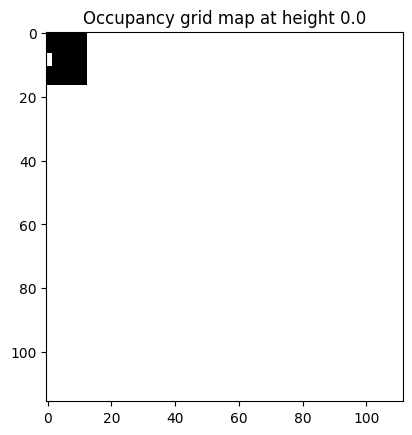

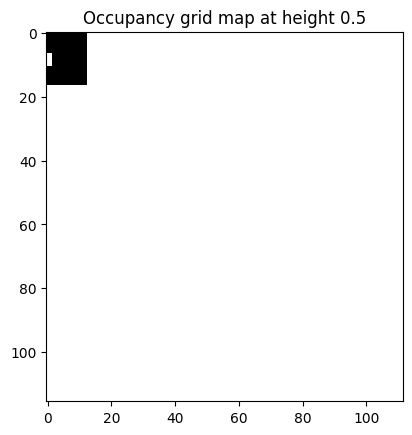

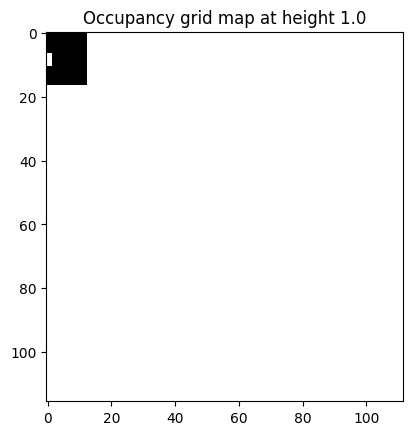

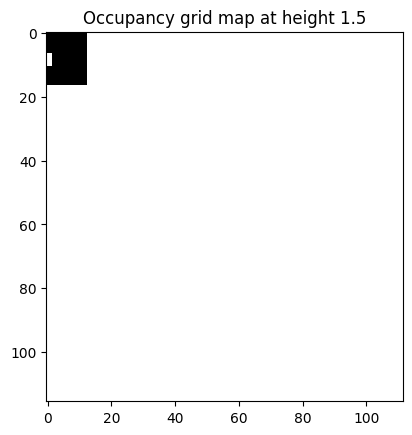

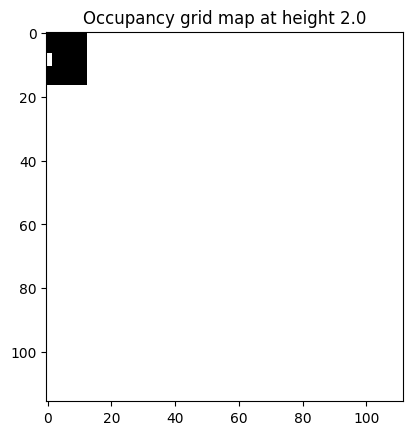

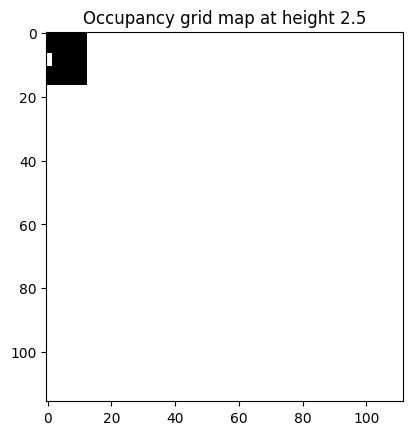

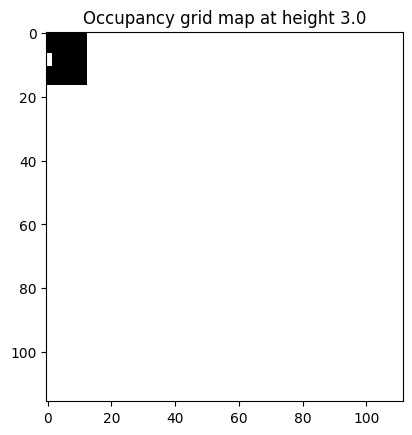

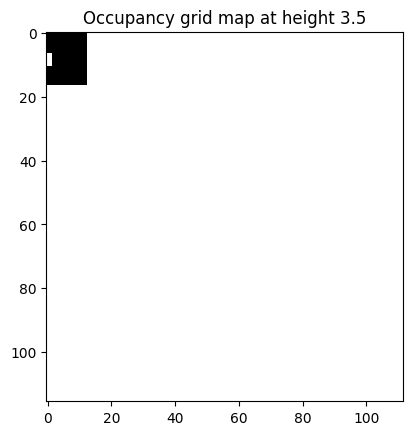

In [153]:
##############################################################################
# TODO: Do tasks described in 2.6
##############################################################################

def plot_occupancy_grid_map(points, h): 
    pt_indices = np.where((points[:,2]<h))[0]
    occupying_pts = points[pt_indices]
    
    if len(occupying_pts):        
        min_x,min_y, _ = np.min(occupying_pts,axis=0)
        max_x,max_y, _ = np.max(occupying_pts,axis=0)
        x_coords, y_coords = occupying_pts[:,0], occupying_pts[:,1]
        
        x_coords = np.array((np.round((x_coords-min_x),2)*100), dtype=np.int64)
        y_coords = np.array((np.round((y_coords-min_y),2)*100), dtype=np.int64)
        
        x_dim = int((max_x-min_x+1)*100)
        y_dim = int((max_y-min_y+1)*100)
        occupancy_grid = np.ones((x_dim, y_dim))
        
        for i in range(len(x_coords)):
            occupancy_grid[int(x_coords[i]),int(y_coords[i])] = 0
        
        plt.figure()
        plt.imshow(occupancy_grid, cmap='gray')
        plt.title(f'Occupancy grid map at height {h}')

points = np.asarray(merged_point_cloud.points)

for i in range(0,8):
    plot_occupancy_grid_map(points,i/2)

plt.show()

##############################################################################
# END OF YOUR CODE
##############################################################################

### (OPTIONAL) SECTION 3: Mapping using 3D LiDAR
This question is similar to section 2 but with LiDAR point cloud.

Your task is to fuse image data from a camera with the measurements from a LiDAR (a laser scanner with a 360° field-of-view that records distance measurements) and associate every point in the image with accurate distance measurements. 

The LiDAR’s frame is defined such that its X-axis points forward, its Y-axis points to the left, and its Z-axis points upwards. And the camera’s frame is defined such that its Z-axis points forward, X-axis points to the right, and Y-axis points downwards. The camera’s center is 8 cm below, 6 cm to the left, and 27 cm in front of the LiDAR’s center (found via extrinsic calibration and as measured by the LiDAR). Both the sensors are positioned such that the camera’s Z-axis and the LiDAR’s X-axis are perfectly parallel. Refer to the figure below for more details. 

<img src="misc/lidar.png" alt="drawing" width="500"/>

A LiDAR frame and its corresponding camera image have been provided as data/lidar-points.bin and data/image.png, respectively. The camera calibration matrix, K, is provided inside data/K.txt.

Code for loading the LiDAR points in Python is provided.

In [ ]:
# def load_velodyne_points(points_path):
#     points = np.fromfile(points_path, dtype=np.float32).reshape(-1, 4)
#     points = points[:,:3]                # exclude reflectance values, becomes [X Y Z]
#     points = points[1::5,:]              # remove every 5th point for display speed (optional)
#     points = points[(points[:,0] > 5)]   # remove all points behind image plane (approximate)
#     return points

3.1 Compute the transformation (R, t) required to transform points in the LiDAR’s frame to the
camera’s frame. Give the transformation in both 
(a) homogeneous matrix form
(b) XYZ Euler angles (RPY)-translation form.

In [ ]:
##############################################################################
# TODO: Do tasks described in 3.1
##############################################################################

# Replace "pass" statement with your code
pass

##############################################################################
# END OF YOUR CODE
##############################################################################

3.2 Then, using this computed transformation and the provided camera calibration matrix, project the LiDAR’s points onto the image plane. Use the color code (colormap) to correspond the depth of the points in the image (color is optional, but it helps in debugging). Use matplotlib or any equivalent library for plotting the points on the image. Visualize the image in this notebook. 

In [ ]:
##############################################################################
# TODO: Do tasks described in 3.2
##############################################################################

# Replace "pass" statement with your code
pass

##############################################################################
# END OF YOUR CODE
##############################################################################